In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [55]:
df = pd.read_csv("housing_price.csv")
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [56]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


# Removing Catogorical features

In [57]:
data = df.loc[:, ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
price = df.loc[:, ['price']]

In [58]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


# Normalising

In [59]:
mean = data.mean()
std  = data.std()
normalized_data = (data - mean) / std

In [60]:
mean

lotsize     5150.265568
bedrooms       2.965201
bathrms        1.285714
stories        1.807692
garagepl       0.692308
dtype: float64

In [61]:
normalized_data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [62]:
normalized_data['bias'] = np.ones(normalized_data.shape[0])
x = normalized_data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]

In [63]:
#x1 = np.ones(6) * 0.7
#np.sum(np.exp(-1 * (x - x1) **2),axis = 1)

In [64]:
#a = np.ones(5)

In [65]:
w = np.zeros((x.shape[1], 1))

In [66]:
def cost(x1, x, y, w,t = 1):
    m = len(y)
    e = (np.dot(x, w) - y) ** 2
    tau = np.array(np.exp(-1 * np.sum(((x - x1) **2), axis = 1)/(2 * t))).reshape(-1,1)
    return np.sum(np.multiply(tau,e))   

In [67]:
alpha = 0.001
iterations = 10000
y = price
lamb = 500
cost(x1, x, y, w)

price    3.905313e+11
dtype: float64

In [68]:
def gradient_descend(x, y, alpha, x1, iterations, t = 1):
    cost_list = []
    w = np.zeros((6,1))

    for i in range(iterations):
        tau = np.array(np.exp(-1 * np.sum(((x - x1) **2), axis = 1)/(2 * t)  )).reshape(-1,1)
        grade = (np.dot(x.T, np.multiply(np.dot(x,w) - y, tau)) ) 
        w = w - alpha * grade
        cost_list.append(cost(x1, x, y, w, t))
    return cost_list, w

In [69]:
x1 = np.array(x.loc[0,:])

price    2.355626e+10
dtype: float64
[[69487.46680622]
 [12355.24932446]
 [ 3188.20494774]
 [ 8409.12463842]
 [ 5475.18496072]
 [ 4743.7417489 ]]
[71748.20218602] Actual = price    42000.0
Name: 0, dtype: float64


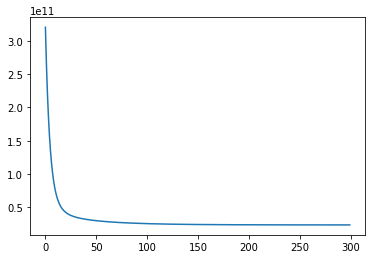

In [70]:
cost_list, w = gradient_descend(x, y, alpha=0.001, x1=x1, iterations=300)
plt.plot(cost_list)
print(cost_list[-1])
print(w)
print(np.dot(x1,w),"Actual = {}".format(price.loc[0,:]))

price    2.837680e+06
dtype: float64
[[ 25090.59263828]
 [  8097.53981103]
 [  1184.0658331 ]
 [-14275.87084561]
 [  5557.59049879]
 [  8963.33869899]]
[40315.45837108] Actual = price    42000.0
Name: 0, dtype: float64


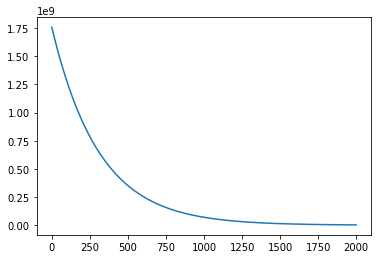

In [53]:
cost_list, w = gradient_descend(x, y, alpha=0.001, x1=x1, iterations=2000, t = 1/1000000)
plt.plot(cost_list)
print(cost_list[-1])
print(w)

print(np.dot(x1,w),"Actual = {}".format(price.loc[0,:]))

In [43]:
def avg_error(x, y, w):
    e = np.abs(np.dot(1/y.T,(np.dot(x, w) - y)))
    return (e)[0][0] * 100 / len(y)

In [44]:
avg_error(x, y, w)

60.00985895589754

# Observation
When value of tau is very small, it will overfit the model because width of the curve will be small and very few points will be responsible for the training. And hence, value of actual cost and predicted costs will be same.